使用sample code 下載訓練資料

In [0]:
from PIL import Image
import numpy as np



先下載 MNIST 資料


In [0]:
import os
import urllib
from urllib.request import urlretrieve
dataset = 'mnist.pkl.gz'
def reporthook(a,b,c):
    print("\rdownloading: %5.1f%%"%(a*b*100.0/c), end="")
    
if not os.path.isfile(dataset):
        origin = "https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz"
        print('Downloading data from %s' % origin)
        urlretrieve(origin, dataset, reporthook=reporthook)

In [0]:
import gzip
import pickle
with gzip.open(dataset, 'rb') as f:
    train_set, validation_set, test_set = pickle.load(f, encoding='latin1')

In [0]:
# 設定好訓練及測試資料
train_X, train_y = train_set
test_X, test_y = test_set
# 設定成我們的格式  (實際作用轉置)
train_X = train_X[..., None]
test_X = test_X[..., None]


In [5]:
# 有 10 種類別，輸入的是 784 維
print(train_X.shape)          ##查看data的模樣 50000筆,781*1矩陣
print(np.unique(train_y))     ##輸出不同的label 0~9

(50000, 784, 1)
[0 1 2 3 4 5 6 7 8 9]


In [6]:
from IPython.display import display
def showX(X):
    int_X = (X*255).clip(0,255).astype('uint8')
    # N*784 -> N*28*28 -> 28*N*28 -> 28 * 28N
    int_X_reshape = int_X.reshape(-1,28,28).swapaxes(0,1).reshape(28,-1)
    display(Image.fromarray(int_X_reshape))
# 訓練資料， X 的前 20 筆
print(train_y[:20])
showX(train_X[:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [22]:
X = train_X[0]
X.shape

(784, 1)

In [85]:
# 參考範例 softmax regression
W = np.random.normal(size=(10, 784)) ##隨機產生矩陣
b = np.random.normal(size=(10, 1))
n_data = train_X.shape[0]
# 紀錄 loss
loss_history = []
accuracy_history = []
for epoch in range(5000):    
    idx = np.random.choice(n_data, 300, replace=False)
    #print(idx)
    X = train_X[idx]
    #print(X)
    y = train_y[idx]
    one_y = np.eye(10)[y][..., None]          ##softmax 和 cross_entropy的微分可以合成a(1-a)*-1/a  (a-1)
    d = np.exp(W @ X + b)                     ##用隨機矩陣算出10*1矩陣  然後各項取exp
    #print(d)
    q = d/d.sum(axis=(1,2), keepdims=True)    ##轉成機率0~9項加起來機率為1
    #print(q)
    loss = -np.log(q[range(len(y)), y]).mean()##計算300項平均loss單純紀錄
    #print("loss:",loss)
    #print("len(y):",len(y))
    #print("q[range(len(y)), y]",q[range(len(y)), y])
    #print("(q[range(len(y)), y]).mean()",(q[range(len(y)), y]).mean())
    loss_history.append(loss)                 ##紀錄
    accuracy = (q.argmax(axis=1).ravel() == y).mean()##如果預測=實際標籤
    accuracy_history.append(accuracy)
    if epoch%100 == 0:
        print(epoch, accuracy, loss)
    grad_b_all = q - one_y                    ##上方偏微分合成-->grad_b只有扣掉one_y one_y為正確的label行的單位矩陣
    grad_b = grad_b_all.mean(axis=0)          ##將300項的偏微分後取平均
    grad_W_all = grad_b_all @ X.swapaxes(1,2) ##將grad_b@上原X轉置 變成10*784矩陣
    grad_W = grad_W_all.mean(axis=0)          ##取平均
    W -=  grad_W
    b -= grad_b    


0 0.15333333333333332 14.63223380288235
100 0.7933333333333333 0.9889771452523318
200 0.8166666666666667 0.9063788945624003
300 0.8366666666666667 0.7049083502095693
400 0.86 0.6254087933357959
500 0.8366666666666667 0.8138982105650922
600 0.8766666666666667 0.6269772414889172
700 0.8533333333333334 0.6842706022167242
800 0.8833333333333333 0.5595314817566176
900 0.8966666666666666 0.4254446426708707
1000 0.89 0.3429665420414404
1100 0.9166666666666666 0.3656383245729867
1200 0.8766666666666667 0.5020489929617965
1300 0.86 0.5777867899915429
1400 0.92 0.33195484450001483
1500 0.8966666666666666 0.49935780511049777
1600 0.8966666666666666 0.4208854971674009
1700 0.91 0.4469923072062955
1800 0.8866666666666667 0.3638871846588336
1900 0.8966666666666666 0.3795065746268861
2000 0.9033333333333333 0.39756098348104224
2100 0.9033333333333333 0.3648252799070942
2200 0.9033333333333333 0.4251138235567569
2300 0.9066666666666666 0.300456574976408
2400 0.9233333333333333 0.3570454592352217
2500 

In [80]:

print(grad_W_all)
#print(grad_W)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [8]:
    idx = np.random.choice(n_data, 300, replace=False)
    X = train_X[idx]
    y = train_y[idx]
    print(X[1].shape)
    print(y[:2])

(784, 1)
[4 9]


In [9]:
# test data 的正確率
((W @ test_X + b).argmax(axis=1).ravel() == test_y).mean()

0.2446

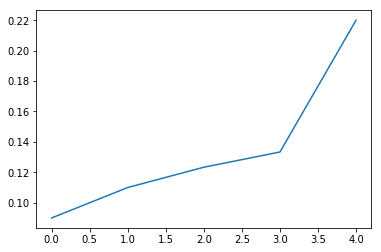

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
# 準確率的圖
plt.plot(accuracy_history);

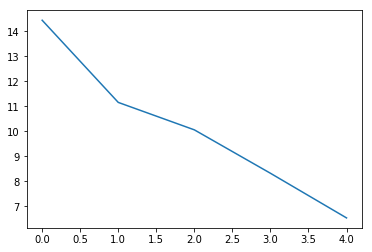

In [11]:
# loss 的圖
plt.plot(loss_history);

In [0]:
def softmax(x):
    t = np.exp(x)
    return t/t.sum(axis=(-2,-1),keepdims=True)
def relu(x):
    return np.maximum(x, 0)
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 微分
def Drelu(x):
    return (x>0).astype('float32')
def Dsigmoid(x):
    q = sigmoid(x)
    return q * (1-q) 
    # or 
    #return np.exp(x)/(1+np.exp(-x))**2